In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('911.csv')
df.head(3)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [5]:
# 어느 도시에서 몇 건의 사건이 발행했는지 상위 10개도시의 발생건수를 bar chart

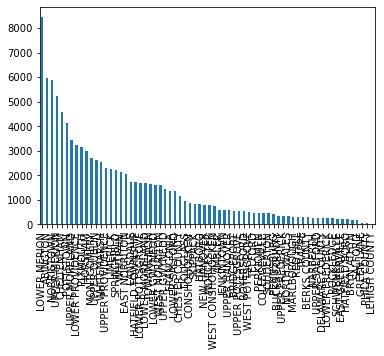

In [10]:
df['twp'].value_counts()[:100].plot(kind='bar')

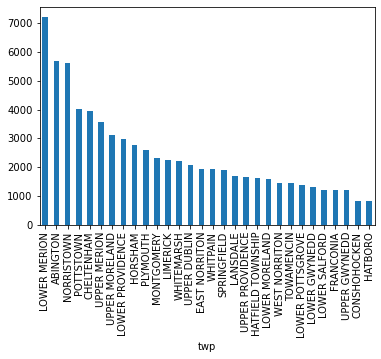

In [16]:
df.groupby('twp')['zip'].count().sort_values(ascending=False)[:30].plot(kind='bar')

In [18]:
# title columns에서 각각의 사고유형의 갯수를 bar chart로 표시하시오..
# 1. 사고유형 추출
# 2. 사고유형별 건수
# 3. 차트

In [23]:
df.title.apply(lambda x: x.split(':')[0])

0            EMS
1            EMS
2           Fire
3            EMS
4            EMS
          ...   
99487    Traffic
99488    Traffic
99489        EMS
99490        EMS
99491    Traffic
Name: title, Length: 99492, dtype: object

In [25]:
df.title.apply(lambda x: x.split(':')[0]).value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: title, dtype: int64

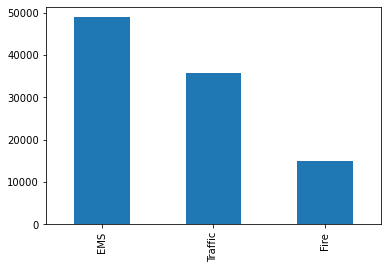

In [26]:
df.title.apply(lambda x: x.split(':')[0]).value_counts().plot(kind='bar')

In [ ]:
# 월별 사건 발생 추이를 line chart로 나타내시오..

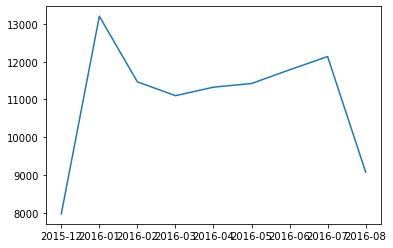

In [46]:
df['timeStamp'].apply(lambda x: x[:7]).value_counts().sort_index().plot()

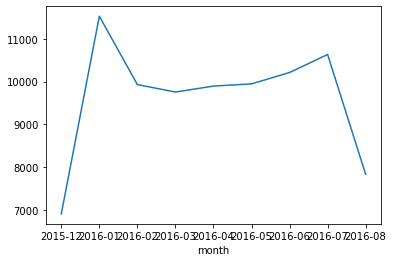

In [50]:
df['month'] = df['timeStamp'].apply(lambda x: x[:7])
df.groupby('month')['zip'].count().plot()

In [54]:
# 각 월에 어느 사건유형이 몇 건 발생했는지  월별 사건 유형 발생건수를 출력하시오..
# 그리고 table로 만들어서 heatmap으로 시각화하시오..
df['kind']= df['title'].apply(lambda x:x.split(':')[0])

In [57]:
df.groupby(['month','kind'])['zip'].count()

month    kind   
2015-12  EMS        3538
         Fire        960
         Traffic    2409
2016-01  EMS        5545
         Fire       1669
         Traffic    4313
2016-02  EMS        4890
         Fire       1632
         Traffic    3408
2016-03  EMS        5295
         Fire       1418
         Traffic    3042
2016-04  EMS        5146
         Fire       1494
         Traffic    3255
2016-05  EMS        5217
         Fire       1358
         Traffic    3371
2016-06  EMS        5145
         Fire       1556
         Traffic    3511
2016-07  EMS        5494
         Fire       1651
         Traffic    3488
2016-08  EMS        4057
         Fire       1274
         Traffic    2501
Name: zip, dtype: int64

In [58]:
df.groupby(['month','kind'])['zip'].count().unstack()

kind,EMS,Fire,Traffic
month,,,
2015-12,3538,960,2409
2016-01,5545,1669,4313
2016-02,4890,1632,3408
2016-03,5295,1418,3042
2016-04,5146,1494,3255
2016-05,5217,1358,3371
2016-06,5145,1556,3511
2016-07,5494,1651,3488
2016-08,4057,1274,2501


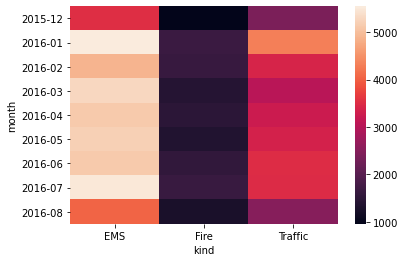

In [59]:
sns.heatmap(df.groupby(['month','kind'])['zip'].count().unstack())

In [61]:
df.head(10)
df.iloc[[1,3], [1,3]]

,lng,zip
1,-75.264680,19446.0
3,-75.343513,19401.0
